In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#first download the dataset from this link, you need to be logged in
# https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/download?datasetVersionNumber=1
# save it in your google drive, for this notebook this is the path /content/drive/MyDrive/Datasets/Brain_MRI_Images_for_Brain_tumor_detection/archive.zip
# make a new directory
!mkdir dataset
%cd dataset
!cp /content/drive/MyDrive/Datasets/Brain_MRI_Images_for_Brain_tumor_detection/archive.zip .
!unzip -q archive.zip

/content/dataset


In [3]:
import pandas as pd
import os
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [71]:
def load_data(parent_folder_path):
  path_parent = parent_folder_path + '/**'
  X=[]
  y=[]
  for path in glob.glob(path_parent, recursive=True):
    if os.path.isfile(path):
      img = cv2.imread(path)
      X.append(img)
      if os.path.basename(os.path.dirname(path)) == "yes":
        y.append(1)
      else:
        y.append(0)
  return np.array(X), np.array(y)

def plot_classes_distribution(y,name='') -> None:
  plt.figure(figsize=(10,5))

  # Check if y is not a list (single array)
  if not isinstance(y,list):
    classes, counts = np.unique(y, return_counts=True)

    plt.bar(classes,counts,width=0.5,color=['green','red'])
    plt.xticks(classes, ['No','Yes'])
    plt.title(f'Classes distribution {name}')
  else:

    y_max=0 # Variable to store the maximum y-axis value across all subplots

    plt.suptitle('Classes distribution')
    for i,el in enumerate(y):
      classes, counts = np.unique(el, return_counts=True)
      plt.subplot(1,3,i+1)
      plt.bar(classes,counts,width=0.5,color=['green','red'])
      plt.xticks(classes, ['No','Yes'])
      plt.title(f'{name[i]}')

      y_max = max(y_max, max(counts)) # Update the maximum y value

      # Set a common y-axis range for all subplots
      for ax in plt.gcf().get_axes():
        ax.set_ylim(0, y_max+10) # Add some extra margin to the maximum y value

  plt.tight_layout()

In [5]:
path = "/content/dataset/brain_tumor_dataset"
X, y = load_data(path)

<ipython-input-4-fe4bf507bf0c>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


Text(0.5, 1.0, 'Distribution of ratios')

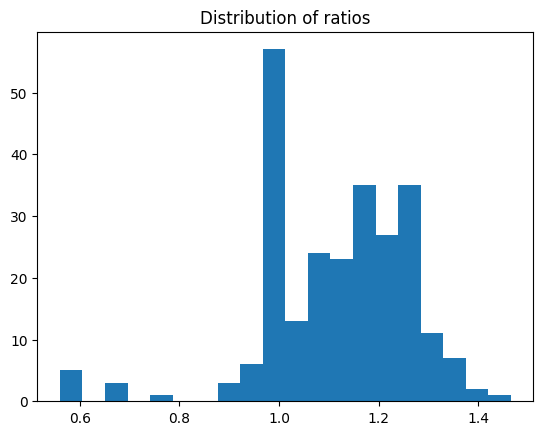

In [6]:
#eda

#size of the images
list_sizes = []
list_ratios = []
for img in X:
  list_sizes.append(img.shape)
  list_ratios.append(img.shape[0]/img.shape[1])

# plt.hist(list_sizes)
plt.figure()
_ = plt.hist(list_ratios, bins=20)
plt.title('Distribution of ratios')

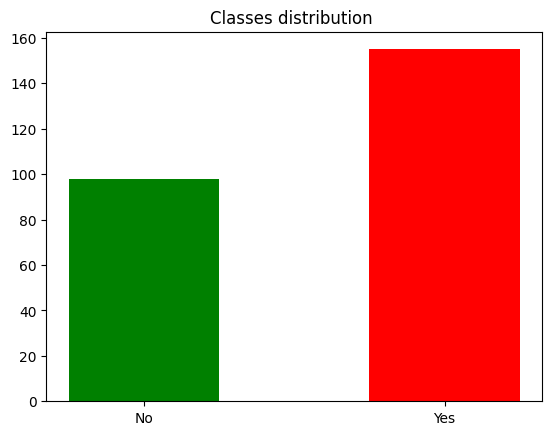

In [12]:
#distribution of classes initial dataset
plot_classes_distribution(y,name='')

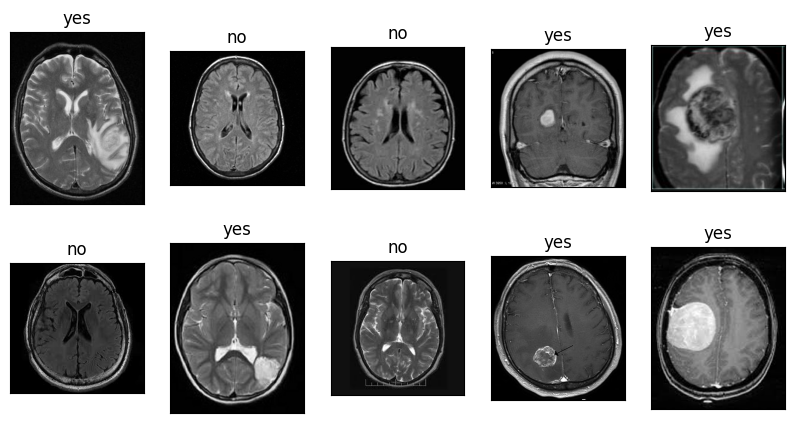

In [22]:
#plot examples from original dataset

plt.figure(figsize=(10,5))
for i in range(10):
  rnd = random.randint(0,len(X))
  plt.subplot(2,5,i+1)
  plt.imshow(X[rnd])
  plt.xticks([])
  plt.yticks([])
  plt.title('yes' if y[rnd]==1 else 'no')
  # plt.tight_layout()

In [9]:
# splitting
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

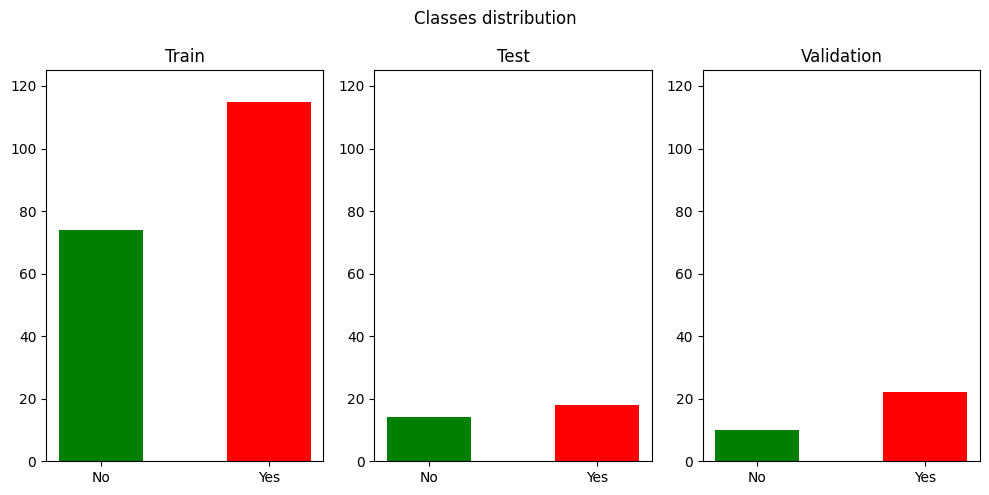

In [73]:
#distribution of classes train test and validation
plot_classes_distribution([y_train,y_test,y_val],['Train','Test','Validation'])

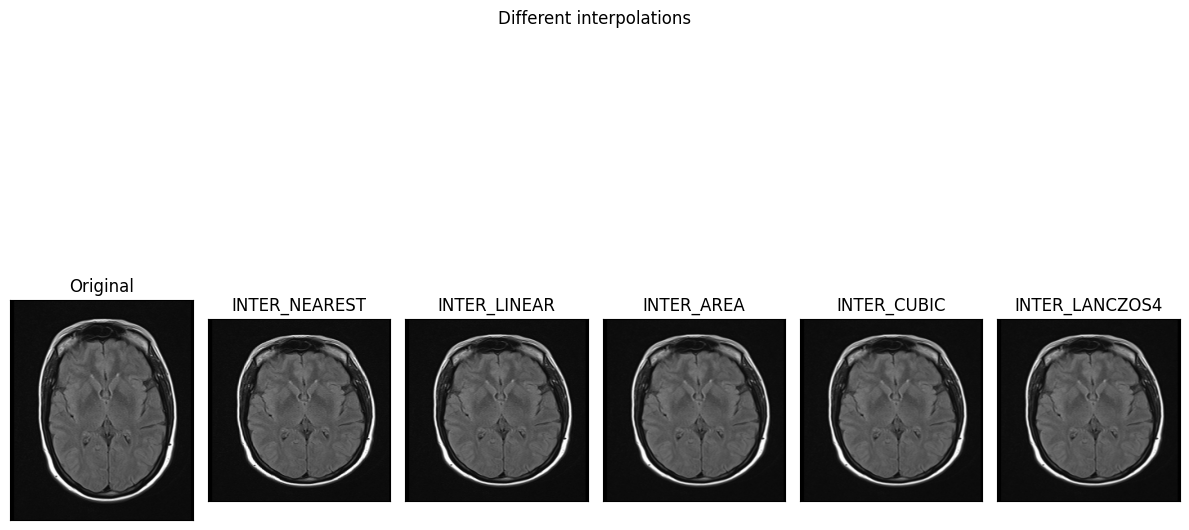

In [90]:
# preprocessing, one image, cropping https://pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/
IMG_SIZE = (224,224)
img = X[0]

#different interpolations
dict_interpolations = {
  'INTER_NEAREST': cv2.INTER_NEAREST,  # fastest, blockiest
  'INTER_LINEAR': cv2.INTER_LINEAR,   # good compromise
  'INTER_AREA': cv2.INTER_AREA,    # slower, smoother than INTER_LINEAR
  'INTER_CUBIC': cv2.INTER_CUBIC,   # slowest, smoothest
  'INTER_LANCZOS4': cv2.INTER_LANCZOS4,  # even slower, even smoother
}

plt.figure(figsize=(12,8))
plt.suptitle('Different interpolations')
plt.subplot(1,6,1)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

for i,interp in enumerate(dict_interpolations):
  plt.subplot(1,6,i+2)
  plt.imshow(cv2.resize(img, dsize=IMG_SIZE, interpolation=dict_interpolations[interp]))
  plt.title( str(interp))
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

# INTER_NEAREST: fastest, blockiest, good for shrinking
# INTER_LINEAR: good compromise, good for both shrinking and enlarging
# INTER_AREA: slower, smoother than INTER_LINEAR, good for shrinking
# INTER_CUBIC: slowest, smoothest, good for enlarging
# INTER_LANCZOS4: even slower, even smoother, good for enlarging

# For resizing an image to 224x224 pixels, INTER_LINEAR or INTER_CUBIC are good choices.
# INTER_NEAREST is a good choice for shrinking images, while INTER_CUBIC is a good choice for enlarging images.